<a href="https://colab.research.google.com/github/NabhyaIoT2026/Stock_Market/blob/main/STOCK_MARKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf

In [3]:
start = '1998-01-01'
end = '2024-10-31'

df = yf.download('TATAMOTORS.NS', start=start, end=end)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,,
1998-01-01 00:00:00+00:00,43.405334,57.537086,58.064072,56.818474,57.086754,3697478
1998-01-02 00:00:00+00:00,44.258255,58.667706,59.098877,57.584995,57.776627,7953061
1998-01-05 00:00:00+00:00,43.174030,57.230476,59.213856,56.818474,59.175529,7576034
1998-01-06 00:00:00+00:00,42.321098,56.099857,57.422108,55.821995,56.626842,6988967
1998-01-07 00:00:00+00:00,42.378922,56.176510,57.086754,55.486641,56.636421,4439791


In [4]:
df.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
Date,,,,,,
2024-10-24 00:00:00+00:00,880.000000,880.000000,890.000000,875.250000,875.250000,7233484
2024-10-25 00:00:00+00:00,864.299988,864.299988,885.750000,857.299988,883.900024,10873022
2024-10-28 00:00:00+00:00,878.450012,878.450012,886.750000,860.200012,867.849976,7106045
2024-10-29 00:00:00+00:00,842.750000,842.750000,882.500000,825.700012,880.250000,26818871
2024-10-30 00:00:00+00:00,840.200012,840.200012,853.599976,838.049988,846.000000,12933218


In [5]:
df=df.reset_index()
df.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,1998-01-01 00:00:00+00:00,43.405334,57.537086,58.064072,56.818474,57.086754,3697478
1,1998-01-02 00:00:00+00:00,44.258255,58.667706,59.098877,57.584995,57.776627,7953061
2,1998-01-05 00:00:00+00:00,43.174030,57.230476,59.213856,56.818474,59.175529,7576034
3,1998-01-06 00:00:00+00:00,42.321098,56.099857,57.422108,55.821995,56.626842,6988967
4,1998-01-07 00:00:00+00:00,42.378922,56.176510,57.086754,55.486641,56.636421,4439791


In [6]:
print(df.columns)

if 'Date' not in df.columns:
    df = df.reset_index()

columns_to_drop = ['Date', 'Adj Close']
df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)

df.head()


MultiIndex([(     'Date',              ''),
            ('Adj Close', 'TATAMOTORS.NS'),
            (    'Close', 'TATAMOTORS.NS'),
            (     'High', 'TATAMOTORS.NS'),
            (      'Low', 'TATAMOTORS.NS'),
            (     'Open', 'TATAMOTORS.NS'),
            (   'Volume', 'TATAMOTORS.NS')],
           names=['Price', 'Ticker'])


<ipython-input-6-18a82aba0f96>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop([col for col in columns_to_drop if col in df.columns], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS,TATAMOTORS.NS
0,57.537086,58.064072,56.818474,57.086754,3697478
1,58.667706,59.098877,57.584995,57.776627,7953061
2,57.230476,59.213856,56.818474,59.175529,7576034
3,56.099857,57.422108,55.821995,56.626842,6988967
4,56.176510,57.086754,55.486641,56.636421,4439791


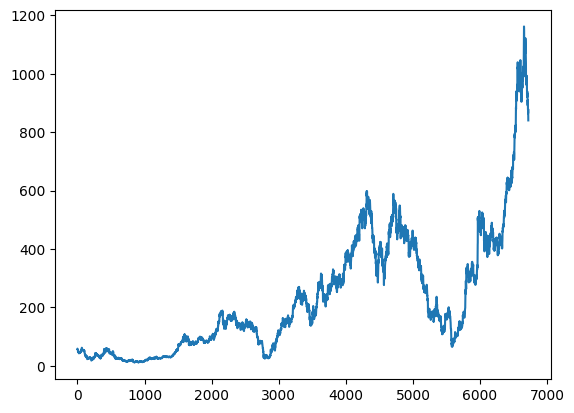

In [7]:
plt.plot(df.Close)

In [8]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,TATAMOTORS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6715,1004.019500
6716,1003.157999
6717,1002.903499
6718,1002.031499


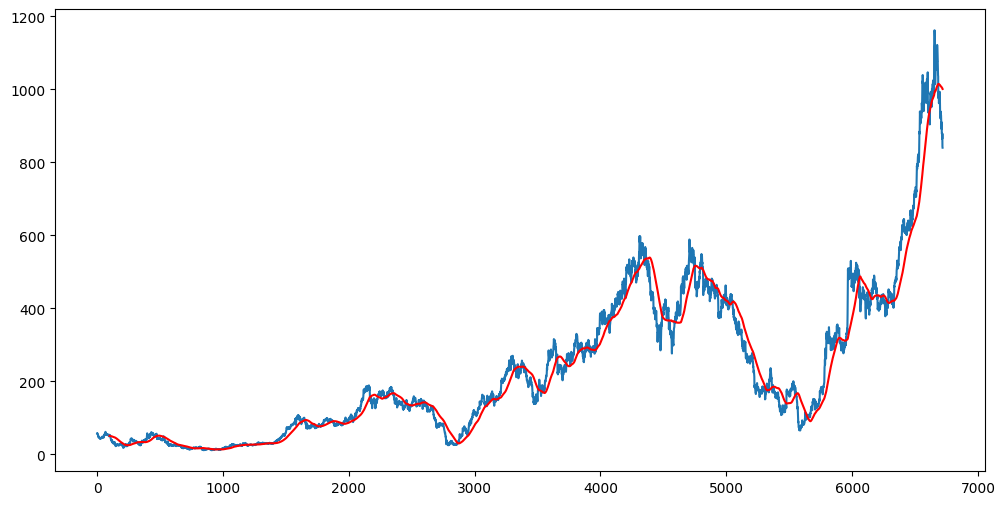

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [10]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,TATAMOTORS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
6715,971.207751
6716,971.607250
6717,972.092250
6718,972.327250


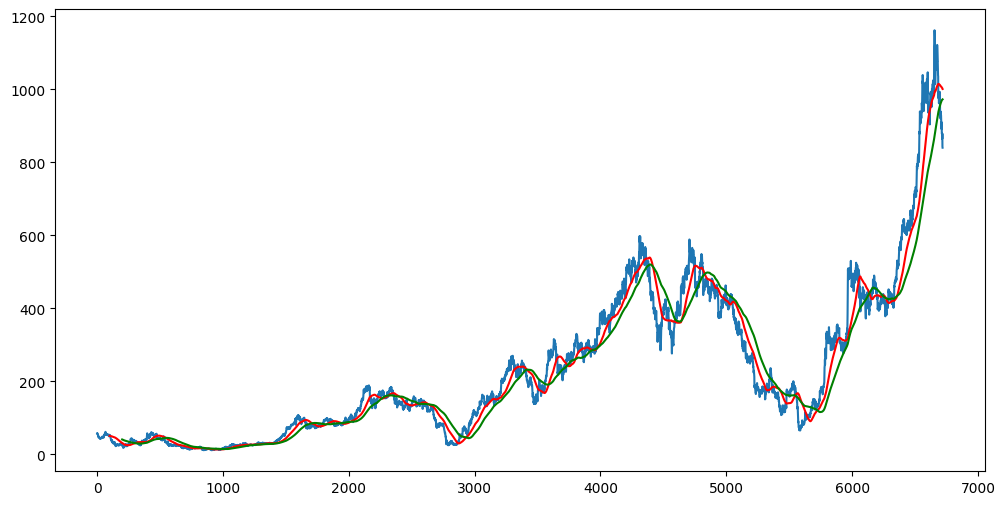

In [11]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [12]:
df.shape

(6720, 5)

In [13]:
#Splitting Data into Training and Testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(4704, 1)
(2016, 1)


In [14]:
data_training.head()

Ticker,TATAMOTORS.NS
0,57.537086
1,58.667706
2,57.230476
3,56.099857
4,56.176510


In [15]:
data_testing.head()

Ticker,TATAMOTORS.NS
4704,537.700012
4705,543.650024
4706,549.849976
4707,588.700012
4708,587.400024


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.07884111],
       [0.08076765],
       [0.07831866],
       ...,
       [0.83917229],
       [0.87589271],
       [0.8821974 ]])

In [18]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [19]:
#ML Model

from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [20]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True,))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True,))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 50s 298ms/step - loss: 0.0359
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 43s 298ms/step - loss: 0.0050
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 82s 297ms/step - loss: 0.0045
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 82s 298ms/step - loss: 0.0037
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 82s 298ms/step - loss: 0.0033
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 82s 298ms/step - loss: 0.0032
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 82s 298ms/step - loss: 0.0027
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 84s 313ms/step - loss: 0.0028
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 82s 314ms/step - loss: 0.0029
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 80s 298ms/step - loss: 0.0025
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 43s 298ms/step - loss: 0.0025
Epoch 12/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 84s 310ms/step - loss: 0.0025
Epoch 13/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 84s 322ms/step - loss: 0.0021
Epoch 14/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 79s 300ms/step - loss: 0.0024
Epoch 15/20
144

In [23]:
model.save('keras_model.h5')

In [24]:
data_testing.head()

Ticker,TATAMOTORS.NS
4704,537.700012
4705,543.650024
4706,549.849976
4707,588.700012
4708,587.400024


In [25]:
past_100_days=data_training.tail(100)

In [26]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [27]:
final_df.head()

Ticker,TATAMOTORS.NS
0,376.700012
1,375.200012
2,371.450012
3,386.649994
4,395.799988


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.28398159],
       [0.28261367],
       [0.27919385],
       ...,
       [0.74155308],
       [0.70899641],
       [0.70667095]])

In [29]:
input_data.shape

(2116, 1)

In [30]:
x_test=[]
y_test=[]

for i in range(100 , input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [31]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(2016, 100, 1)
(2016,)


In [32]:
#Making Predictions

y_predicted=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step


In [33]:
y_predicted.shape

(2016, 1)

In [34]:
y_test

array([0.43080573, 0.43623185, 0.4418859 , ..., 0.74155308, 0.70899641,
       0.70667095])

In [35]:
scaler.scale_
a=scaler.scale_
a

array([0.00091195])

In [36]:
scale_factor=1/a
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

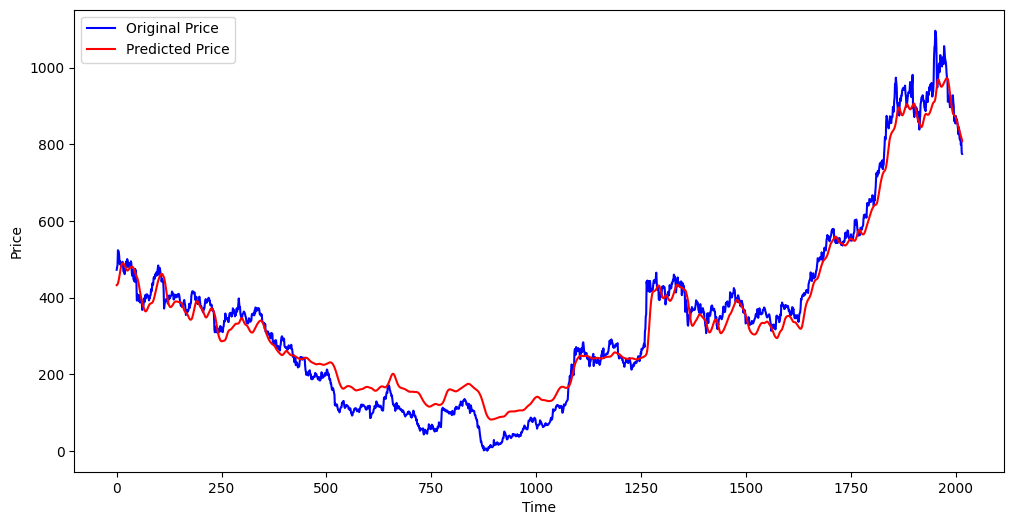

In [37]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()